<a href="https://colab.research.google.com/github/ananya253/Python/blob/main/Supervised_learning_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Libraries

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Exploratory Data Analysis

In [ ]:
#Loading the dataset
train_df = pd.read_csv('/content/Training_data.csv')
test_df = pd.read_csv('/content/Testing_data.csv')

train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [ ]:
train_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5240.000000
mean,0.159744,32.606851,65.102052
std,0.366401,24.614976,30.056443
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.800000
50%,0.000000,29.000000,70.650000
75%,0.000000,56.000000,90.050000
max,1.000000,72.000000,118.750000


In [ ]:
#Checking missing values
train_df.isnull().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [ ]:
train_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#Drop unwanted columns
train_df.drop(columns=['customerID'], inplace=True)

In [ ]:
train_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#Checking duplicate values
train_df.duplicated().sum()

np.int64(8)

In [ ]:
#Removing duplicate values
train_df.drop_duplicates(inplace=True)

###Outlier Detection

<Axes: xlabel='count', ylabel='Churn'>

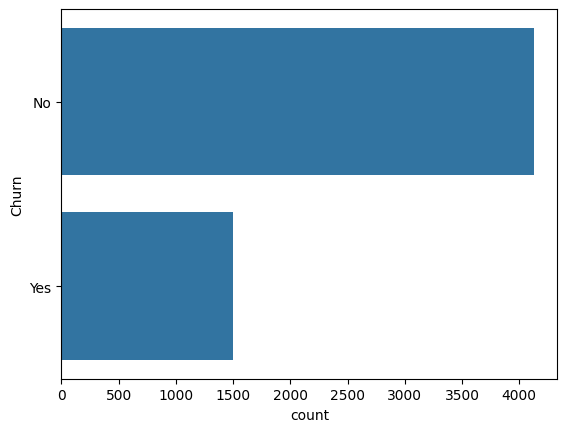

In [ ]:
sns.countplot(train_df['Churn'])

<Axes: ylabel='tenure'>

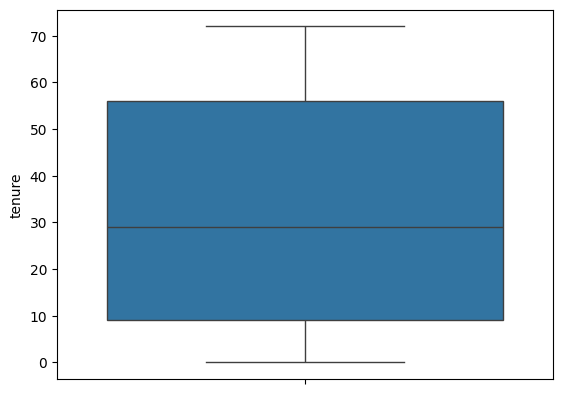

In [ ]:
sns.boxplot(train_df['tenure'])

<Axes: ylabel='MonthlyCharges'>

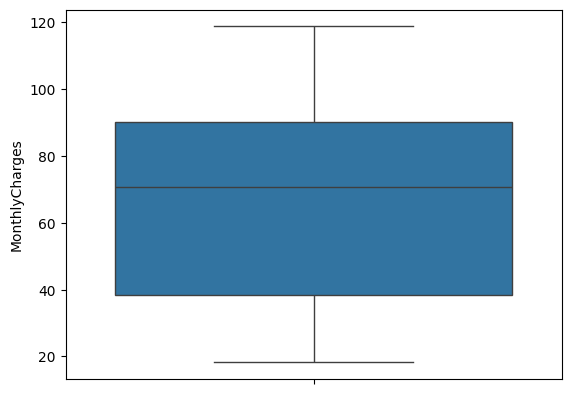

In [ ]:
sns.boxplot(train_df['MonthlyCharges'])

<Axes: ylabel='TotalCharges'>

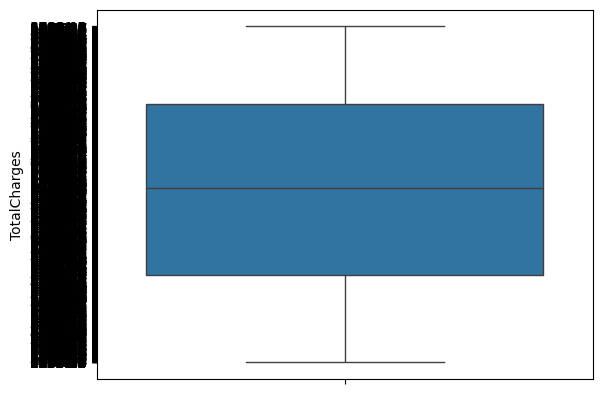

In [ ]:
sns.boxplot(train_df['TotalCharges'])

##Data Preprocessing

####Handling Missing Values

In [ ]:
train_df['gender'] = train_df['gender'].fillna(train_df['gender'].mode()[0])

In [ ]:
train_df['OnlineSecurity'] = train_df['OnlineSecurity'].fillna(train_df['OnlineSecurity'].mode()[0])

In [ ]:
train_df['MonthlyCharges'] = train_df['MonthlyCharges'].fillna(train_df['MonthlyCharges'].mean())

In [ ]:
train_df['TotalCharges'] = train_df['TotalCharges'].fillna(train_df['TotalCharges'].mode()[0])

In [ ]:
train_df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


###Encoding


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
l_encoder = LabelEncoder()

In [ ]:
train_df['Partner'] = l_encoder.fit_transform(train_df['Partner'])
train_df['Dependents'] = l_encoder.fit_transform(train_df['Dependents'])
train_df['PhoneService'] = l_encoder.fit_transform(train_df['PhoneService'])
train_df['PaperlessBilling'] = l_encoder.fit_transform(train_df['PaperlessBilling'])
train_df['Churn'] = l_encoder.fit_transform(train_df['Churn'])


train_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,0,0,35,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,0,Mailed check,20.75,700.45,0
1,Female,0,0,0,28,0,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,1,Mailed check,35.75,961.4,0
2,Male,0,0,0,56,1,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,0,Electronic check,98.60,5581.05,0
3,Male,0,1,0,39,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,1,Bank transfer (automatic),20.45,790,0
4,Female,0,1,1,43,0,No phone service,DSL,No,Yes,No,Yes,Yes,No,One year,1,Bank transfer (automatic),51.25,2151.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,Male,0,0,0,51,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.00,5038.15,0
5630,Male,1,1,0,68,0,No phone service,DSL,Yes,Yes,Yes,No,No,No,Two year,1,Electronic check,41.95,2965.75,0
5631,Male,0,1,1,72,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Bank transfer (automatic),19.95,1322.85,0
5632,Female,0,0,0,69,1,No,DSL,No,No,Yes,Yes,Yes,Yes,Two year,1,Credit card (automatic),82.45,5555.3,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5626 entries, 0 to 5633
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5626 non-null   object 
 1   SeniorCitizen     5626 non-null   int64  
 2   Partner           5626 non-null   int64  
 3   Dependents        5626 non-null   int64  
 4   tenure            5626 non-null   int64  
 5   PhoneService      5626 non-null   int64  
 6   MultipleLines     5626 non-null   object 
 7   InternetService   5626 non-null   object 
 8   OnlineSecurity    5626 non-null   object 
 9   OnlineBackup      5626 non-null   object 
 10  DeviceProtection  5626 non-null   object 
 11  TechSupport       5626 non-null   object 
 12  StreamingTV       5626 non-null   object 
 13  StreamingMovies   5626 non-null   object 
 14  Contract          5626 non-null   object 
 15  PaperlessBilling  5626 non-null   int64  
 16  PaymentMethod     5626 non-null   object 
 17  